
# AUTHOR - SHIVAM SHEKHAR

# TASK 1 TSF 
___ 

## PREDICTION USING SUPERVISED ML


___

* **predict the percentage of an student based on the number of study**

___

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
hours = df.Hours
scores = df.Scores
hours[:5] , scores[:5]

(0    2.5
 1    5.1
 2    3.2
 3    8.5
 4    3.5
 Name: Hours, dtype: float64,
 0    21
 1    47
 2    27
 3    75
 4    30
 Name: Scores, dtype: int64)

### Plotting a graph to get a sense of the data

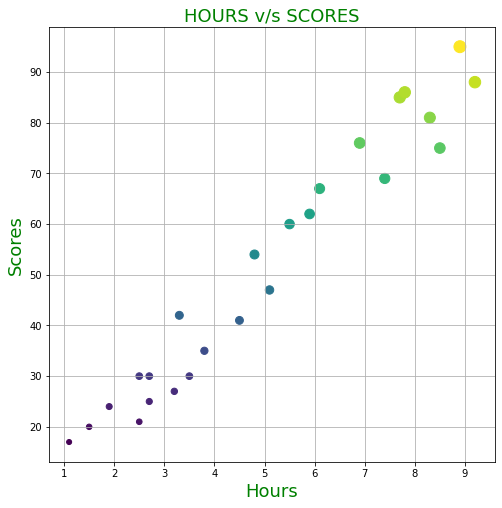

In [4]:
plt.figure(figsize = ( 8 , 8 ))
plt.scatter(hours , scores , c = scores , s = scores*1.5) 
plt.xlabel("Hours" , size = 18 , color = 'green')
plt.ylabel("Scores" , size = 18 , color = 'green')
plt.title("HOURS v/s SCORES" ,  size = 18 , color = 'green') 
plt.grid()
plt.show()

The above Scatter Graph signifies the relation between Hours and Scores

### Splitting the data for Model Training

In [5]:
hours = df.iloc[:,:-1]
scores = df.iloc[:,1]
hours[:5] , scores[:5]

(   Hours
 0    2.5
 1    5.1
 2    3.2
 3    8.5
 4    3.5,
 0    21
 1    47
 2    27
 3    75
 4    30
 Name: Scores, dtype: int64)

In [6]:
hour_train , hour_test , score_train , score_test = train_test_split(hours , scores , random_state = 0)

In [7]:
# TRAINING THE MODEL 
lin_reg = LinearRegression() 
lin_reg.fit(hour_train , score_train)

LinearRegression()

### Seeing how well does it fit with the data values

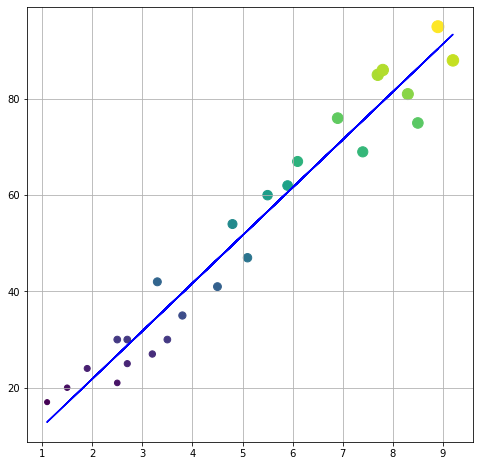

In [8]:
plt.figure(figsize=(8,8))
line = lin_reg.coef_*hours + lin_reg.intercept_
plt.scatter(hours , scores , c = scores , s = scores*1.5) 
plt.plot(hours , line , "b-")
plt.grid()

### Predictions 

In [9]:
scores_pred = lin_reg.predict(hour_test)
scores_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [10]:
# comparing the Actual scores versus the predicted

compare = pd.DataFrame({"Actual Value" : score_test , "Predicted Value" : scores_pred})
compare

,Actual Value,Predicted Value
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


### comparing the values of actual scores and the predicted scores

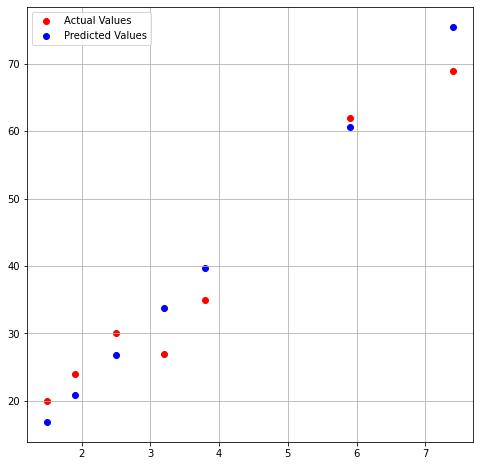

In [11]:

plt.figure(figsize=(8,8))
plt.scatter(hour_test , score_test , c = "red" , label= "Actual Values")
plt.scatter(hour_test , scores_pred , c = "blue" , label= "Predicted Values")
plt.legend()
plt.grid()

In [12]:
train_score = lin_reg.score(hour_train , score_train) 

test_score = lin_reg.score(hour_test , score_test)
train_score , test_score

(0.9484509249326872, 0.9367661043365055)

___
## Asking user for input as a list of hours to get the possible percentages that can be predicted 
___

In [15]:
n = int(input("Enter how many Percentage you want to predict!!: ")) 
h = [float(x) for x in input().split()]
for i in range(n):
    prediction = lin_reg.predict([[h[i]]])
    print("Possible Percentage will be " , "%.2f"%prediction[0] , " provided the number of hours a student studies is ",h[i])
    

Enter how many Percentage you want to predict!!: 1
9.25
Possible Percentage will be  93.89  provided the number of hours a student studies is  9.25


### Comparing scores of training and testing data

<ipython-input-14-6ac585688510>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i , y[i]/2 ,"%.2f"%y[i] , ha = "center" , Bbox = dict(facecolor = 'white', alpha =.8))


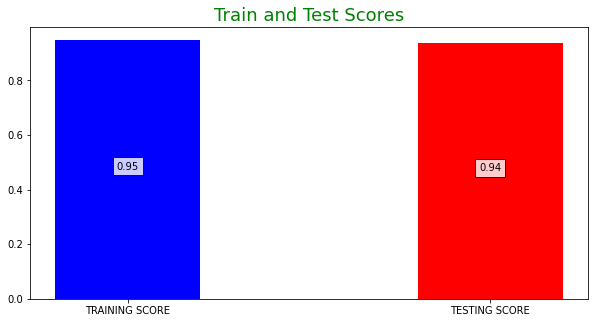

In [14]:

plt.figure(figsize = (10,5))
plt.bar(['TRAINING SCORE','TESTING SCORE']  ,[train_score , test_score], width = 0.4 , color = ['blue','red'])
y = [train_score , test_score]
for i in range(2):
    plt.text(i , y[i]/2 ,"%.2f"%y[i] , ha = "center" , Bbox = dict(facecolor = 'white', alpha =.8))
plt.title("Train and Test Scores" , size = 18 , color = "green")
plt.show()